In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('sales_2014.csv')
df.head()

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date
0,13729,C508,Bob,1/1/2014,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,3/1/2014
1,28774,C372,John,1/1/2014,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2/1/2014
2,9285,C212,Bob,2/1/2014,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,4/1/2014
3,37537,C015,Bob,2/1/2014,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2/1/2014
4,37537,C015,Bob,2/1/2014,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,4/1/2014


In [3]:
df.isnull().sum()

Order ID             0
Customer ID          0
SalesPerson          0
Order Date           0
Order Priority       0
SKU                  0
Order Quantity       0
Unit Sell Price      0
Discount             0
Shipping Amount      0
Ship Mode            0
Product Container    0
Ship Date            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           2153 non-null   int64  
 1   Customer ID        2153 non-null   object 
 2   SalesPerson        2153 non-null   object 
 3   Order Date         2153 non-null   object 
 4   Order Priority     2153 non-null   object 
 5   SKU                2153 non-null   object 
 6   Order Quantity     2153 non-null   int64  
 7   Unit Sell Price    2153 non-null   float64
 8   Discount           2153 non-null   float64
 9   Shipping Amount    2153 non-null   float64
 10  Ship Mode          2153 non-null   object 
 11  Product Container  2153 non-null   object 
 12  Ship Date          2153 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 218.8+ KB


In [5]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           2153 non-null   int64         
 1   Customer ID        2153 non-null   object        
 2   SalesPerson        2153 non-null   object        
 3   Order Date         2153 non-null   datetime64[ns]
 4   Order Priority     2153 non-null   object        
 5   SKU                2153 non-null   object        
 6   Order Quantity     2153 non-null   int64         
 7   Unit Sell Price    2153 non-null   float64       
 8   Discount           2153 non-null   float64       
 9   Shipping Amount    2153 non-null   float64       
 10  Ship Mode          2153 non-null   object        
 11  Product Container  2153 non-null   object        
 12  Ship Date          2153 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory us

In [7]:
df['Total_sales']=df['Unit Sell Price']+df['Shipping Amount']-df['Discount']
df['Total_sales']

0       130.91
1        10.57
2        43.91
3       340.53
4       145.91
         ...  
2148    624.40
2149      6.85
2150    204.97
2151     17.87
2152    193.19
Name: Total_sales, Length: 2153, dtype: float64

In [8]:
Sum_of_sales=0
for i in df['Total_sales']:
    Sum_of_sales += i
print(Sum_of_sales)  

261098.61000000048


In [41]:
df.head()

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Total_sales
0,13729,C508,Bob,2014-01-01,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,2014-01-03,130.91
1,28774,C372,John,2014-01-01,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2014-01-02,10.57
2,9285,C212,Bob,2014-01-02,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,2014-01-04,43.91
3,37537,C015,Bob,2014-01-02,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2014-01-02,340.53
4,37537,C015,Bob,2014-01-02,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,2014-01-04,145.91


In [19]:
sales_by_person=df.groupby('SalesPerson')['Total_sales'].sum().reset_index()

In [21]:
sales_by_person

,SalesPerson,Total_sales
0,Bob,98602.42
1,John,71897.41
2,Richard,90598.78


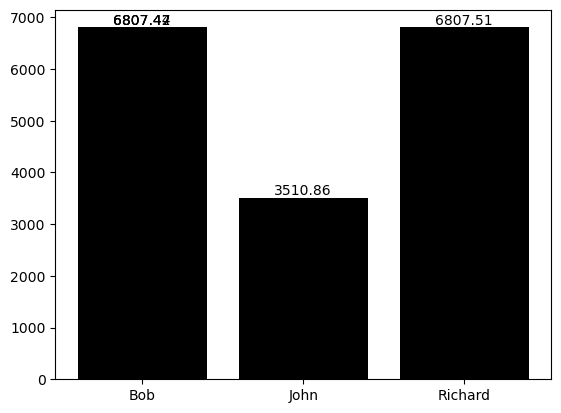

In [23]:
w=plt.bar(df['SalesPerson'],df['Total_sales'],color='black')
plt.bar_label(w)
plt.show()

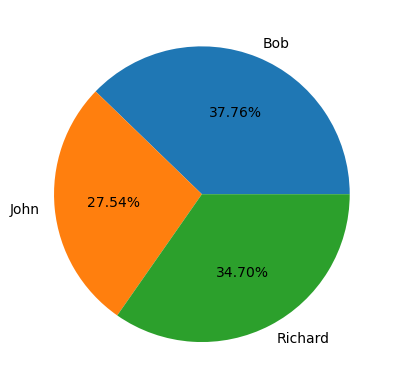

In [25]:
plt.pie(sales_by_person['Total_sales'],labels=sales_by_person['SalesPerson'],autopct='%1.2f%%')
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           2153 non-null   int64         
 1   Customer ID        2153 non-null   object        
 2   SalesPerson        2153 non-null   object        
 3   Order Date         2153 non-null   datetime64[ns]
 4   Order Priority     2153 non-null   object        
 5   SKU                2153 non-null   object        
 6   Order Quantity     2153 non-null   int64         
 7   Unit Sell Price    2153 non-null   float64       
 8   Discount           2153 non-null   float64       
 9   Shipping Amount    2153 non-null   float64       
 10  Ship Mode          2153 non-null   object        
 11  Product Container  2153 non-null   object        
 12  Ship Date          2153 non-null   datetime64[ns]
 13  Total_sales        2153 non-null   float64       
dtypes: datet

In [31]:
fd=df.groupby('SalesPerson')['Order Quantity'].sum().reset_index()
fd

,SalesPerson,Order Quantity
0,Bob,18251
1,John,17608
2,Richard,18521


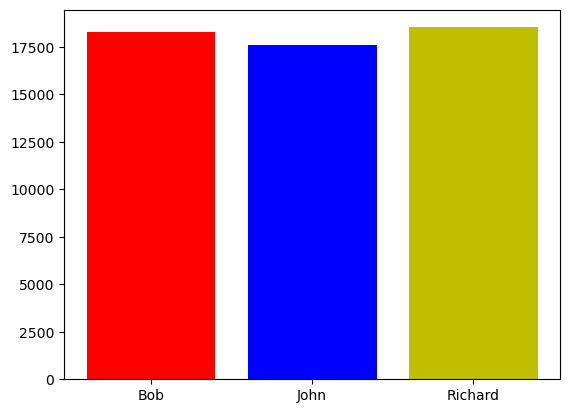

In [35]:
colors=('r','b','y')
plt.bar(fd['SalesPerson'],fd['Order Quantity'],color=colors)
plt.show()

In [43]:
df['order month']=df['Order Date'].dt.month
df['order month']

0        1
1        1
2        1
3        1
4        1
        ..
2148    12
2149    12
2150    12
2151    12
2152    12
Name: order month, Length: 2153, dtype: int32

In [47]:
import calendar

In [49]:
df['order month name']=df['order month'].apply(lambda x:calendar.month_name[x])
df['order month name']

0        January
1        January
2        January
3        January
4        January
          ...   
2148    December
2149    December
2150    December
2151    December
2152    December
Name: order month name, Length: 2153, dtype: object

In [51]:
df.head()

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Total_sales,order month,order month name
0,13729,C508,Bob,2014-01-01,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,2014-01-03,130.91,1,January
1,28774,C372,John,2014-01-01,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2014-01-02,10.57,1,January
2,9285,C212,Bob,2014-01-02,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,2014-01-04,43.91,1,January
3,37537,C015,Bob,2014-01-02,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2014-01-02,340.53,1,January
4,37537,C015,Bob,2014-01-02,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,2014-01-04,145.91,1,January


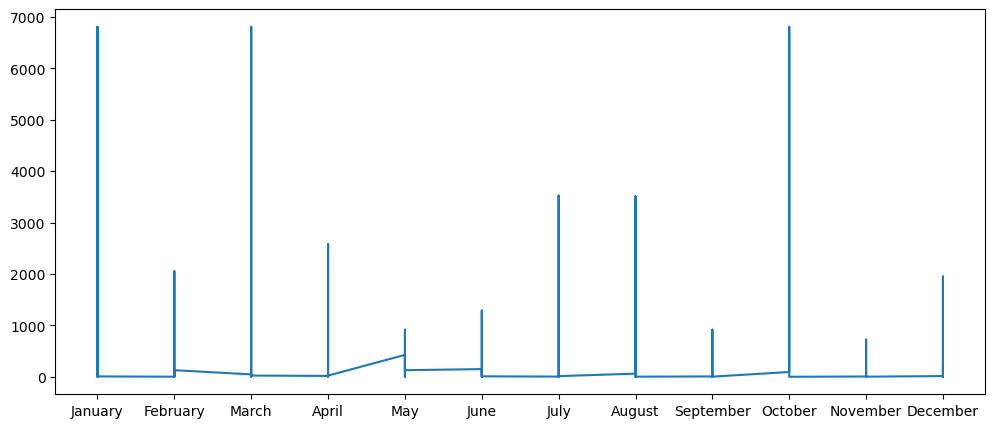

In [59]:
plt.figure(figsize=(12,5))
plt.plot(df['order month name'],df['Total_sales'])
plt.show()